# 98% Accuracy - Binary Classification of Bone Fracture X-rays (Fractured/Not Fractured) - CNN
![](https://www.mdpi.com/sensors/sensors-22-01285/article_deploy/html/images/sensors-22-01285-g020b.png)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import cv2
import warnings

warnings.filterwarnings('ignore')



base_dir = '/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification'
sub_dir = os.listdir(base_dir)
Categories = os.listdir(os.path.join(base_dir,"test"))


img_size = 100

Train_path = '/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train'
Test_path = '/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test'
Val_path = '/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val'




def fetch_data(path):
    data = []
    category = os.listdir(path)
    for cat in category:
        label = Categories.index(cat)
        img_dir = os.path.join(path,cat)
        images = os.listdir(img_dir)
        for img in images:
            try:
                img_array = cv2.imread(os.path.join(img_dir,img), cv2.IMREAD_GRAYSCALE)
                resized_img_array = cv2.resize(img_array, (img_size, img_size))
                data.append([resized_img_array,label])
            except Exception as e:
                pass
    return data
        

Training_data = fetch_data(Train_path)
Testing_data = fetch_data(Test_path)
Val_data = fetch_data(Val_path)
print("Training Data: ", len(Training_data), "Testing Data: ", len(Testing_data), "Validation Data: ", len(Val_data))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
libpng warning: bKGD: invalid
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: bKGD: invalid
libpng warning: bKGD: invalid
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


Training Data:  9243 Testing Data:  506 Validation Data:  829


In [2]:
import random

random.shuffle(Training_data)

def makeX_y(data):
    makeX = []
    makeY = []
    
    for X, y in data:
        makeX.append(X)
        makeY.append(y)
        
    makeX = np.array(makeX).reshape(-1, img_size,img_size, 1)
    makeX = makeX / 255.0
    makeY = np.array(makeY)
    
    return makeX, makeY


X_train, y_train = makeX_y(Training_data)
X_test, y_test = makeX_y(Testing_data)
X_val, y_val = makeX_y(Val_data)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(9243, 100, 100, 1) (9243,)
(506, 100, 100, 1) (506,)
(829, 100, 100, 1) (829,)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout

Model = Sequential()



Model.add(Conv2D(64, (3,3), padding = 'same',input_shape=X_train.shape[1:] ))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size = (2,2)))
Model.add(Dropout(0.2))

Model.add(Flatten())


Model.add(Dense(1))
Model.add(Activation('sigmoid'))

Model.summary()

Model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

History = Model.fit(X_train, y_train, epochs = 15, batch_size = 32, validation_split=0.2)

2024-06-06 08:58:19.192613: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 08:58:19.192725: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 08:58:19.345333: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       160,001 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,641 (627.50 KB)

 Trainable params: 160,641 (627.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
 29/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5068 - loss: 0.8347

I0000 00:00:1717664316.287837      69 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


232/232 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.6819 - loss: 0.5983 - val_accuracy: 0.8994 - val_loss: 0.3226
Epoch 2/15
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9100 - loss: 0.2730 - val_accuracy: 0.9178 - val_loss: 0.2296
Epoch 3/15
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9546 - loss: 0.1739 - val_accuracy: 0.9584 - val_loss: 0.1391
Epoch 4/15
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9724 - loss: 0.1110 - val_accuracy: 0.9584 - val_loss: 0.1257
Epoch 5/15
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9834 - loss: 0.0748 - val_accuracy: 0.9686 - val_loss: 0.1289
Epoch 6/15
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9908 - loss: 0.0565 - val_accuracy: 0.9719 - val_loss: 0.1125
Epoch 7/15
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9907 - loss: 0.0468 - val_accuracy: 0.9751 - val_loss: 0.0773
Epoch 8/15
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9953 - loss: 0.0331 - val_accuracy: 0.9773 - val

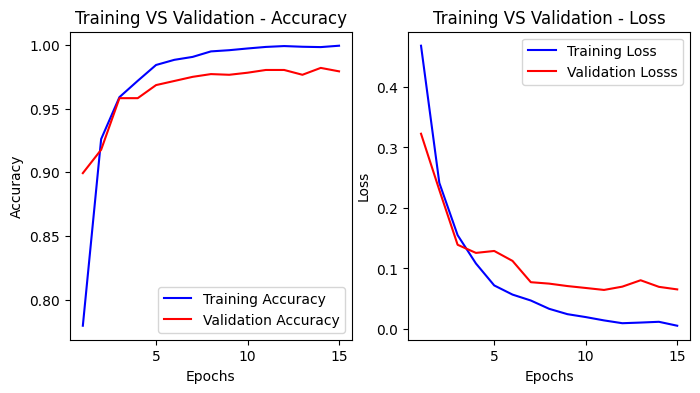

In [4]:
import matplotlib.pyplot as plt

acc = History.history['accuracy']
val_acc = History.history['val_accuracy']

loss = History.history['loss']
val_loss = History.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.title("Training VS Validation - Accuracy")
plt.legend()


plt.subplot(1,2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Losss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title("Training VS Validation - Loss")
plt.legend()
plt.show()


In [5]:
Validation_loss, Validation_accuracy = Model.evaluate(X_val, y_val)
print("Validation Loss - ", Validation_loss, "Validation Accuracy - ", Validation_accuracy)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9697 - loss: 0.1159
Validation Loss -  0.1955282986164093 Validation Accuracy -  0.958986759185791


In [6]:
y_pred = Model.predict(X_test)


threshold = 0.5
y_pred_label = []
fractured_count = 0
not_fractured_count = 0

for pred in y_pred:
    if(pred < 0.5):
        y_pred_label.append(0)
        not_fractured_count += 0
    else:
        y_pred_label.append(1)
        fractured_count += 1
        
true_count = 0
for true, pred in zip(y_test, y_pred_label):
    if true == pred:
        true_count += 1
print(f"Out of {len(y_test)} Samples, {true_count} Samples have the correct prediction from the model")
print("Accuracy ----> ", (true_count/len(y_test))*100)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Out of 506 Samples, 492 Samples have the correct prediction from the model
Accuracy ---->  97.23320158102767
